In [22]:
print('suka')

suka


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
#from ydata_profiling import ProfileReport

In [24]:
df = pd.read_excel('D:/loren/Desktop/Uni/Unsupervised/Exam Project/Unsupervised/dataset.xlsx')
df.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
2,3,0,0,1,32,0,0,1,1,1,0,3,0,0,0,0,0,0
3,12,0,1,1,24,1,1,1,1,1,0,3,0,4,0,0,1,0
4,10,1,0,1,58,0,0,0,1,1,0,3,3,3,0,0,1,0
5,10,0,1,1,29,1,0,1,1,0,0,1,0,0,1,0,0,0
6,9,0,0,1,30,0,0,1,0,1,0,2,0,0,0,0,0,0
7,10,1,0,1,30,1,0,1,1,1,0,1,0,0,0,0,0,0
8,7,1,0,1,26,0,0,0,1,1,0,3,0,15,0,0,1,0
9,8,1,1,1,28,0,0,1,0,1,0,2,2,1,0,0,0,0


In [4]:
print("The dataframe shape is : {}".format(df.shape))

The dataframe shape is : (40108, 18)


In [5]:
# Check for missing values

print("The number of missing values is : {}".format(df.isna().sum()))

The number of missing values is : Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64


In [6]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Age,40108.0,8.578089,2.851519,1.0,7.0,9.0,11.0,13.0
Sex,40108.0,0.482946,0.499715,0.0,0.0,0.0,1.0,1.0
HighChol,40108.0,0.517503,0.499700,0.0,0.0,1.0,1.0,1.0
CholCheck,40108.0,0.971327,0.166887,0.0,1.0,1.0,1.0,1.0
BMI,40108.0,29.954523,7.435545,12.0,25.0,29.0,33.0,98.0
Smoker,40108.0,0.494490,0.499976,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,40108.0,0.144086,0.351181,0.0,0.0,0.0,0.0,1.0
PhysActivity,40108.0,0.677346,0.467497,0.0,0.0,1.0,1.0,1.0
Fruits,40108.0,0.589384,0.491952,0.0,0.0,1.0,1.0,1.0
Veggies,40108.0,0.778473,0.415279,0.0,1.0,1.0,1.0,1.0


In [7]:
# check for duplicates

df_duplicates_index = df[df.duplicated()]
df_duplicates_index

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
170,6,1,0,1,28,0,0,1,1,1,0,2,0,0,0,0,0,0
209,8,1,0,1,27,0,0,1,1,1,0,1,0,0,0,0,0,0
249,9,0,0,1,22,0,0,1,1,1,0,1,0,0,0,0,0,0
253,7,0,0,1,27,1,0,1,1,1,0,1,0,0,0,0,1,0
537,1,1,0,1,21,0,0,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40056,11,1,1,1,30,1,0,0,1,1,0,3,0,0,0,1,1,0
40065,10,1,1,1,25,0,0,0,1,0,0,2,0,0,0,0,0,0
40082,7,1,0,1,25,0,0,0,1,1,0,2,0,0,0,0,0,0
40086,7,0,0,1,29,0,0,1,0,1,0,2,0,0,0,0,0,0


In [25]:
df_adj = df.drop_duplicates()
print("The NEW shape of the dataframe after DROPPING the DUPLICATES is : {}".format(df_adj.shape))

The NEW shape of the dataframe after DROPPING the DUPLICATES is : (37652, 18)


In [26]:
data_csv = df_adj.to_csv('df_adj_2.csv',sep = ',',index = False, encoding = 'utf-8')

In [27]:
df = pd.read_csv('df_adj_2.csv')
df.describe(include = 'all')

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000,37652.000000
mean,8.604244,0.482099,0.527781,0.969962,30.174333,0.503400,0.151891,0.660416,0.575534,0.766945,0.044061,2.913258,3.833475,6.167826,0.273877,0.526214,0.560820,0.067247
std,2.856384,0.499686,0.499234,0.170695,7.558390,0.499995,0.358920,0.473574,0.494268,0.422783,0.205234,1.101508,8.165261,10.236421,0.445952,0.499319,0.496294,0.250453
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
profile = ProfileReport(df)

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>],
       [<Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Hypertension'}>,
        <Axes: title={'center': 'Stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

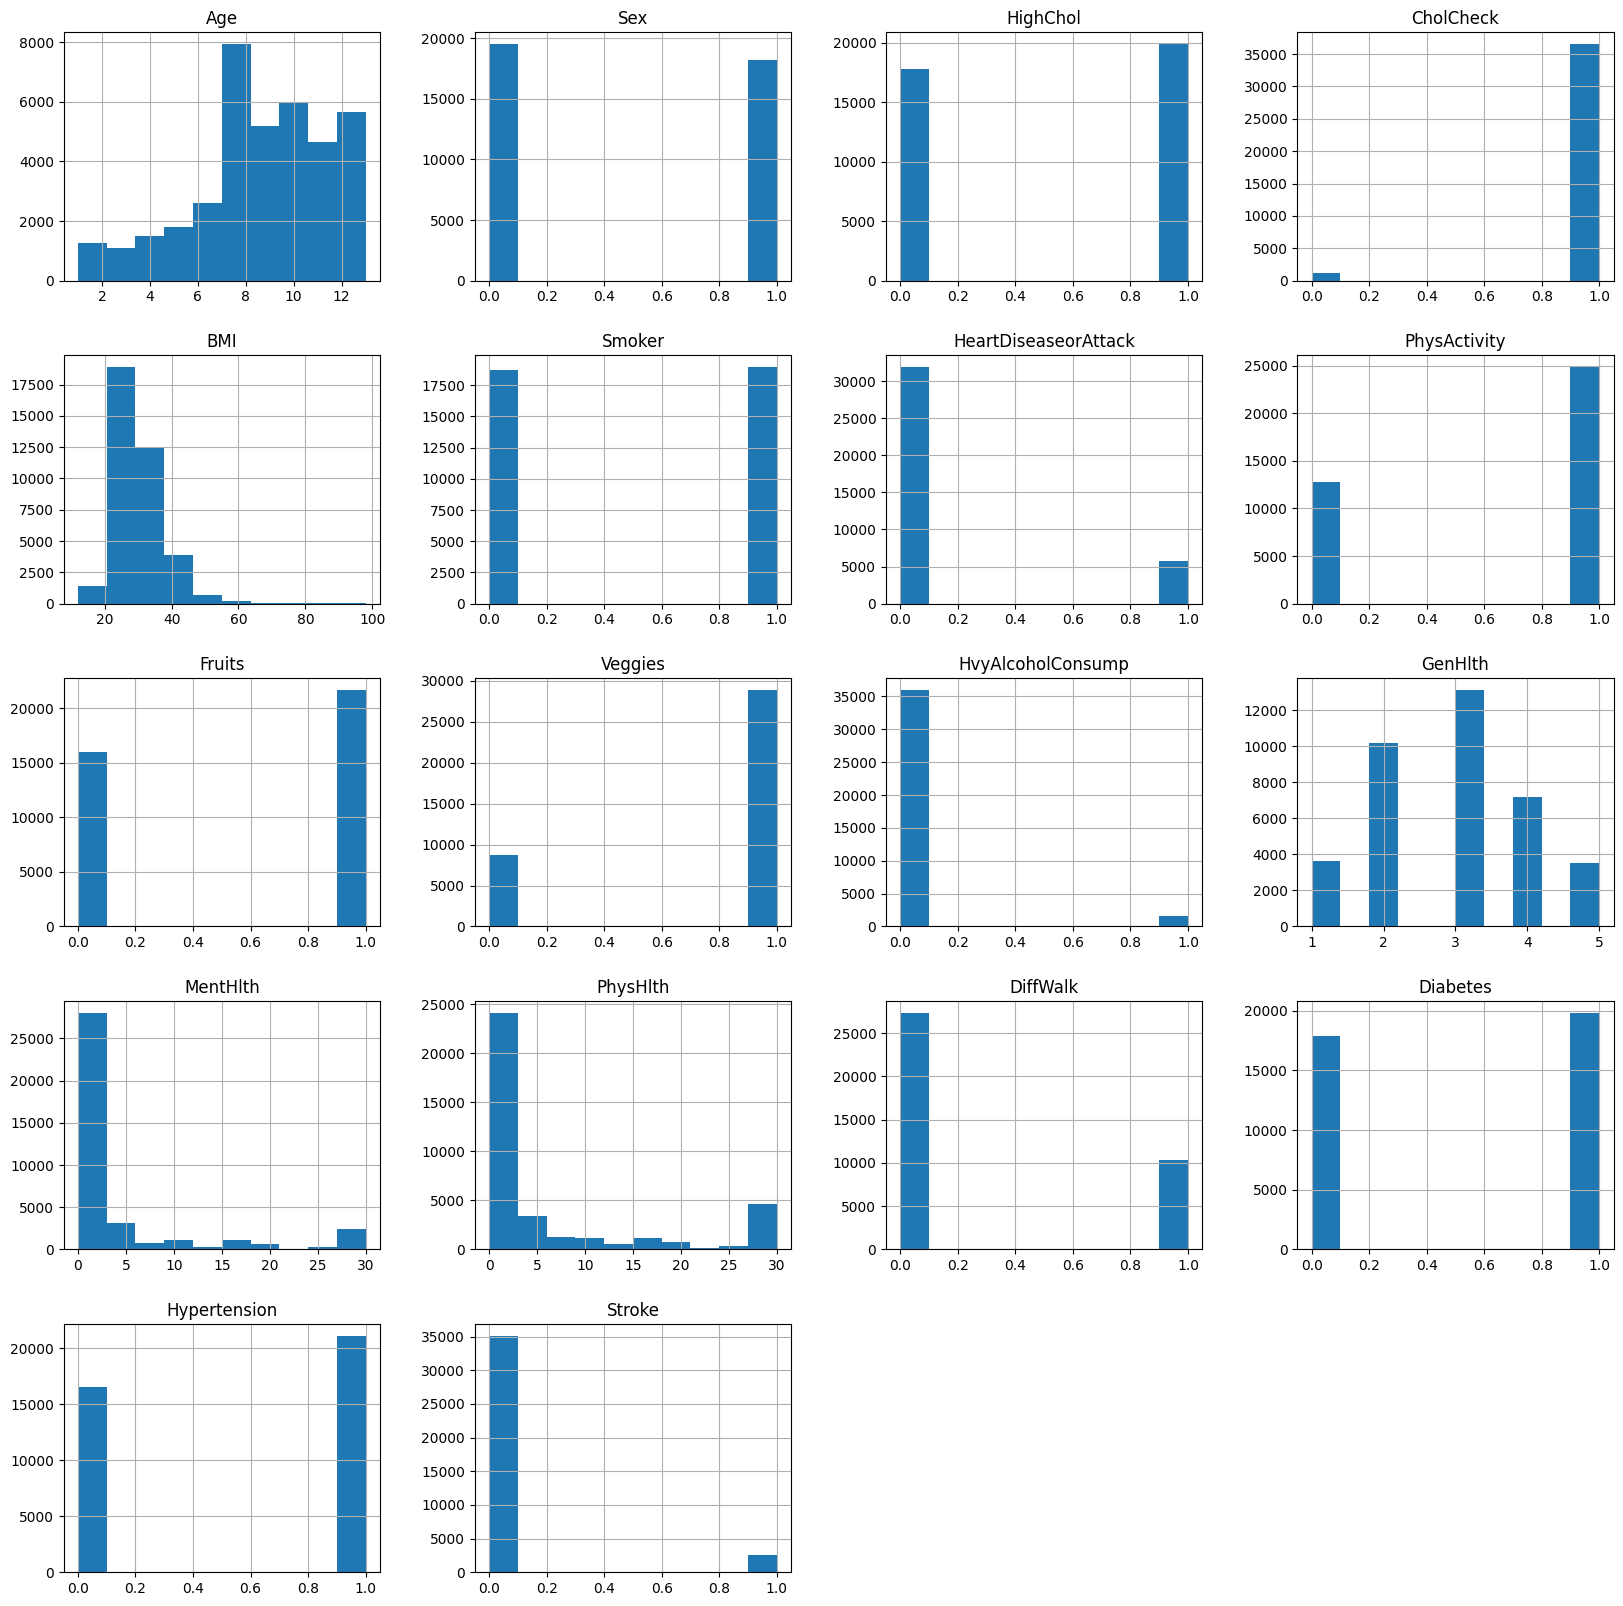

In [13]:
df.hist(figsize = (20,20))

In [28]:
remove = ['BMI','GenHlth','PhysHlth','MentHlth','Diabetes']
df_reduced = df.drop(remove, axis = 1)
df_reduced.head()

,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Hypertension,Stroke
0,4,1,0,1,0,0,1,0,1,0,0,1,0
1,8,0,0,1,1,0,1,1,1,0,0,0,0
2,3,0,0,1,0,0,1,1,1,0,0,0,0
3,12,0,1,1,1,1,1,1,1,0,0,1,0
4,10,1,0,1,0,0,0,1,1,0,0,1,0


In [35]:
values = pd.unique(df_reduced['Age'])
values = np.sort(values)
print("list of unique values:",values)

list of unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [36]:
from scipy.spatial.distance import pdist


list_simil_per_age = []

for val in tqdm(values):
    data = df_reduced[df_reduced['Age'] == val]
    val_jaccard = pdist(data, metric = 'jaccard')
    list_simil_per_age.append(val_jaccard)




  0%|          | 0/13 [00:00<?, ?it/s]

In [40]:
list_simil_per_age[1]


array([0.42857143, 0.625     , 0.33333333, ..., 0.42857143, 0.375     ,
       0.28571429])

In [15]:
df[df['Age'] == 1]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
66,1,1,0,1,22,0,0,1,1,1,1,3,0,0,0,0,0,0
104,1,0,0,1,21,0,0,1,1,1,0,2,0,0,0,0,0,0
105,1,0,0,1,25,0,0,1,0,0,0,2,28,0,0,0,0,0
138,1,1,0,1,23,0,0,1,0,1,0,1,0,0,0,0,0,0
209,1,1,0,1,21,0,0,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37129,1,0,0,1,27,1,0,1,0,1,0,5,15,0,0,1,1,0
37341,1,1,0,1,36,1,0,0,0,1,0,2,0,0,0,1,0,0
37479,1,0,1,1,27,0,0,1,0,0,0,3,0,0,1,1,0,0
37492,1,1,0,1,27,1,0,1,0,1,0,3,0,0,0,0,0,0
